# P2 : Investigate A Dataset

#### Investigating the Titanic Dataset. This dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic (taken from www.kaggle.com/c/titanic/data).

## Description Of The Dataset 
VARIABLE DESCRIPTIONS:
survival -      Survival
                (0 = No; 1 = Yes)
pclass   -      Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name     -      Name
sex      -      Sex
age      -      Age
sibsp    -      Number of Siblings/Spouses Aboard
parch    -      Number of Parents/Children Aboard
ticket   -      Ticket Number
fare     -      Passenger Fare
cabin    -      Cabin
embarked -      Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling : Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse  : Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent  : Mother or Father of Passenger Aboard Titanic
Child   : Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

## Question Phase

#### 1. Did factors like Age, Sex and Socio-Economic Status play a role in the survival of a passenger? If so, then to what extent?
#### 2. Did traveling with family (parents, children, siblings or spouse) increase the chance of survival of a passenger? If so, then to what extent?
#### 3. Did the location of a passenger's cabin affect the chances of his/her survival?

## Wrangling Phase

#### (i) Data Acquisition

In [2]:
## Loading the data into Python

import pandas as pd

passengerinfo_file='C:/Users/Trivedi/Desktop/Data Analytics/P2/P2 - Titanic Data/titanic_data.csv'
passengerinfo = pd.read_csv(passengerinfo_file)
passengerinfo.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


Just looking at the data, one can see that the relating to Age and Cabin of quite a few passengers is missing. This may lead to an incomplete analysis of Q1 and Q3. However, most of the data relating to Pclass (Socio-economic class), Sex, SibSp (Siblings/Spouse) and Parch (Parent/Child) is present here which can result in a reasonable analysis for Q1 and Q2.

#### (ii) Data Cleaning

In [3]:
## Dropping entries having missing data
passengerinfo.dropna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S


In [19]:
import numpy as np 

total_passengers = 891.0
nonmissing_rows=len(passengerinfo.dropna())
missing_data_rows = total_passengers - nonmissing_rows
print '{} = {}'.format('Rows with missing data', missing_data_rows)

## Finding percentage of missing data
percent_missing_data =100 - len(passengerinfo.dropna()) * 1.0/len(passengerinfo) * 100
print '{} = {} %'.format('% Of Missing Data', np.around(percent_missing_data, decimals=2))

Rows with missing data = 708.0
% Of Missing Data = 79.46 %


In [20]:
## Finding Missing Cabin Data Rows
missing_cabin_data_rows = len(passengerinfo['Cabin']) - passengerinfo['Cabin'].count()
print '{} = {}'.format('No. of rows with Missing Cabin Data', missing_cabin_data_rows)

## Finding Missing Age Data Rows
missing_age_data_rows = len(passengerinfo['Age']) - passengerinfo['Age'].count()
print '{} = {}'.format('No. of rows with Missing Age Data', missing_age_data_rows)

No. of rows with Missing Cabin Data = 687
No. of rows with Missing Age Data = 177


As 708/891 (i.e. close to 80%) of the rows contain some missing data, we cannot remove all of them. Moreover, most of this missing data is Cabin data of the passenger, so it won't affect critical analysis other than that of Q3. 

## Exploration Phase

### (i) General Statistics Of Data

In [21]:
## Describing general statistics relating to each data column
passengerinfo.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the above data, we can see:
Max aged passenger = 80 yrs
Min aged passenger = 0.42 yrs
Avg age of passenger = 29.69 yrs (~ 30 yrs)
Max passenger fare = $512.32 (Quite a lot for that era)
Min passenger fare = $0.00 (Don't know what to make of that)

As this gives stats of only the numeric data, gender related stats cannot be generated from here.

In [25]:
## Finding the number of male and female passengers
female_pass = (passengerinfo[passengerinfo['Sex'] == 'female'])
print '{} = {}'.format('Number of female passengers', len(female_pass))
male_pass = (passengerinfo[passengerinfo['Sex'] == 'male'])
print '{} = {}'.format('Number of male passengers', len(male_pass))


## Finding the percentage of male and female passengers
percent_female = len(female_pass)/total_passengers*100
percent_male = len(male_pass)/total_passengers*100
print '{} = {} %'.format('% of female passengers', np.around(percent_female, decimals=2))
print '{} = {} %'.format('% of male passengers', np.around(percent_male, decimals=2))

Number of female passengers = 314
Number of male passengers = 577
% of female passengers = 35.24 %
% of male passengers = 64.76 %


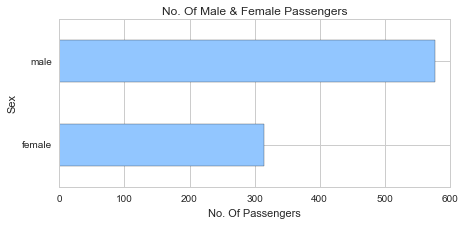

In [40]:
pass_gender = passengerinfo.groupby('Sex')
sex = pass_gender.size()
my_plot = sex.plot(kind='barh', title="No. Of Male & Female Passengers", figsize=(7, 3))
my_plot.set_xlabel("No. Of Passengers")

Therefore, the no.of men (64.76%) on board Titanic far exceeded the no. of women (35.24%).

### (ii) What role did a passenger's gender play in his/her survival? 

In [41]:
## Finding the percentage of female passengers who survived
percent_female_survived = len(passengerinfo[(passengerinfo['Survived'] == 1) & (passengerinfo['Sex'] == "female")])/(len(female_pass)*1.0)*100
print '{} = {}'.format('% of surviving Females', np.around(percent_female_survived, decimals=2))


##Finding the percentage of male passengers who survived
percent_male_survived = len(passengerinfo[(passengerinfo['Survived'] == 1) &  (passengerinfo['Sex'] == "male")])/(len(male_pass)*1.0)*100
print '{} = {}'.format('% of surviving Males', np.around(percent_male_survived, decimals=2))


% of surviving Females = 74.2
% of surviving Males = 18.89


In [45]:
## Function to plot a graph of input data1 and data2
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

def plotbar(data1, data2, title, c1, c2, n, l1,l2): 
    n_groups = 1
    means_men = (data1)
    means_women = (data2)
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.3
    opacity = 0.7
    error_config = {'ecolor': '0.3'}

    rects1 = plt.bar(index, means_men, bar_width,
                     alpha=opacity,
                     color=c1,
                     yerr=0,
                     error_kw=error_config,
                     label=l1)

    rects2 = plt.bar(index +0.5 + bar_width, means_women, bar_width,
                     alpha=opacity,
                     color=c2,
                     yerr=0,
                     error_kw=error_config,
                     label=l2)

    plt.xlabel('')
    plt.ylabel('Percentages')
    plt.title(title)
    plt.xticks(index + bar_width, (''))
    plt.legend()
    plt.yticks(n)
    plt.tight_layout()
    plt.show()

Populating the interactive namespace from numpy and matplotlib


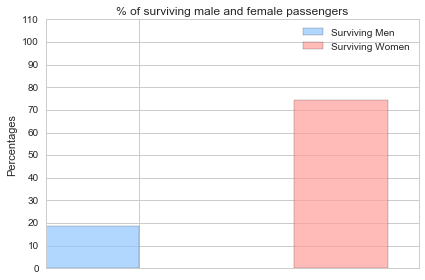

In [47]:
## Plotting the percentages of surviving males and females
plotbar(percent_male_survived, percent_female_survived, '% of surviving male and female passengers','b','r',np.arange(0, 120, 10),'Surviving Men', 'Surviving Women')

From these stats, we can see that the no. of surviving males is far less than the no. of surviving females, regardless of the fact that the no. of males far exceeded the females in the first place.
I think this was due to the fact that during the evacuation process of RMS Titanic, the women, children and elderly were the first to board the lifeboats, with any remaining free spaces for men. The survival stats we see here most probably is a result of that decision by Captain Smith.  

### (iii) What role did a passenger's age play in his/her survival?

In [50]:
## Finding the number of children and adults who survived
num_of_children= len(passengerinfo[passengerinfo['Age'] < 18])
num_of_adults= len(passengerinfo[passengerinfo['Age'] >= 18])

## In most countries of the world, minor is legally defined as a person under the age of 18
num_of_children_who_survived= len(passengerinfo[(passengerinfo['Age'] < 18) & (passengerinfo['Survived'] == 1)])
num_of_adults_who_survived= len(passengerinfo[(passengerinfo['Age'] >= 18) & (passengerinfo['Survived'] == 1)])

print '{} = {}'.format('No. of Children',  num_of_children)
print '{} = {}'.format('No. of Adults', num_of_adults)
print '{} = {}'.format('No. of surviving children', num_of_children_who_survived)
print '{} = {}'.format('No. of surviving adults', num_of_adults_who_survived)

##Finding percentages of children and adults who survived
percent_children_who_survived = num_of_children_who_survived*1.0/num_of_children * 100
percent_adults_who_survived = num_of_adults_who_survived*1.0/num_of_adults * 100

print '{} = {} %'.format('% of surviving children', np.around(percent_children_who_survived, decimals=2))
print '{} = {} %'.format('% of surviving adults', np.around(percent_adults_who_survived, decimals=2))

No. of Children = 113
No. of Adults = 601
No. of surviving children = 61
No. of surviving adults = 229
% of surviving children = 53.98 %
% of surviving adults = 38.1 %


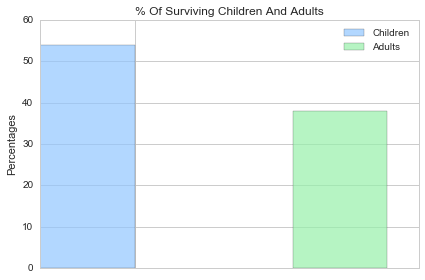

In [67]:
## Plotting the percentages of surviving children and adults
plotbar(percent_children_who_survived, percent_adults_who_survived, '% Of Surviving Children And Adults','b','g',np.arange(0, 70, 10),'Children','Adults')

From these stats, it is evident that more percentage of children (age < 18) survived this disaster than adults. This might also result from the fact that ladies and children were the first to be evacuated in lifeboats when the ship started sinking.

### (iv) What role did a passenger's socio-economic class play in his/her survival?

In [52]:
## Finding the number of passengers belonging to first, second and third class
class1_pass= len(passengerinfo[passengerinfo['Pclass'] == 1])
class2_pass= len(passengerinfo[passengerinfo['Pclass'] == 2])
class3_pass= len(passengerinfo[passengerinfo['Pclass'] == 3])

## Finding the number of passengers belonging to first, second and third class who did survived
surviving_class1_pass = len(passengerinfo[(passengerinfo['Pclass'] == 1) & (passengerinfo['Survived'] == 1)])
surviving_class2_pass = len(passengerinfo[(passengerinfo['Pclass'] == 2) & (passengerinfo['Survived'] == 1)])
surviving_class3_pass = len(passengerinfo[(passengerinfo['Pclass'] == 3) & (passengerinfo['Survived'] == 1)])

print '{} = {}'.format('1st Class Passengers', class1_pass)
print '{} = {}'.format('2nd Class Passengers', class2_pass)
print '{} = {}'.format('3rd Class Passengers', class3_pass)
print '{} = {}'.format('Surviving 1st Class Passengers', surviving_class1_pass)
print '{} = {}'.format('Surviving 2nd Class Passengers', surviving_class2_pass)
print '{} = {}'.format('Surviving 3rd Class Passengers', surviving_class3_pass)

1st Class Passengers = 216
2nd Class Passengers = 184
3rd Class Passengers = 491
Surviving 1st Class Passengers = 136
Surviving 2nd Class Passengers = 87
Surviving 3rd Class Passengers = 119


In [55]:
## Finding percentages of people belonging to the first, second, third class who survived
percent_surviving_class1_pass = surviving_class1_pass*1.0/class1_pass * 100
percent_surviving_class2_pass = surviving_class2_pass*1.0/class2_pass * 100
percent_surviving_class3_pass = surviving_class3_pass*1.0/class3_pass * 100

print '{} = {} %'.format('% of surviving 1st Class Passengers', np.around(percent_surviving_class1_pass, decimals=2))
print '{} = {} %'.format('% of surviving 2nd Class Passengers', np.around(percent_surviving_class2_pass, decimals=2))
print '{} = {} %'.format('% of surviving 3rd Class Passengers', np.around(percent_surviving_class3_pass, decimals=2))

% of surviving 1st Class Passengers = 62.96 %
% of surviving 2nd Class Passengers = 47.28 %
% of surviving 3rd Class Passengers = 24.24 %


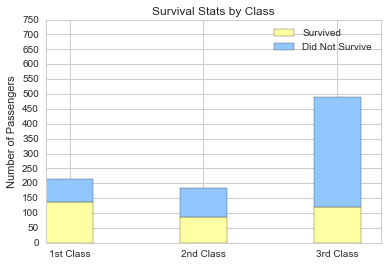

In [57]:
##Plotting percentages of people belonging to the first, second, third class who did/did not survive
import numpy as np
import matplotlib.pyplot as plt

N = 3
survivedMeans = (surviving_class1_pass, surviving_class2_pass, surviving_class3_pass)
notsurvivedMeans = ((class1_pass - surviving_class1_pass), (class2_pass - surviving_class2_pass), (class3_pass - surviving_class3_pass))

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, survivedMeans, width, color='y')
p2 = plt.bar(ind, notsurvivedMeans, width, color='b', bottom=survivedMeans)

plt.ylabel('Number of Passengers')
plt.title('Survival Stats by Class')
plt.xticks(ind + width/2, ('1st Class', '2nd Class', '3rd Class'))
plt.yticks(np.arange(0, 800, 50))
plt.legend((p1[0], p2[0]), ('Survived', 'Did Not Survive'))

plt.show()

It is evident from the stacked bar plot that the percentage of surviving 1st class passengers was greater than those of 2nd and 3rd class. This probably resulted from a bias given to passengers belonging to higher socio-economic classes during the boarding of the rescue boats. The most affected were the 3rd class passengers with a survival rate of less than 1 out of 4.

### (v) Did being a women passenger of a higher socio-economic status increase a passenger's chances of survival?

In [60]:
## Finding number of males and females belonging to different classes 
class1_females = len(passengerinfo[(passengerinfo['Pclass'] ==1) & (passengerinfo['Sex'] == "female")])
class1_males = len(passengerinfo[(passengerinfo['Pclass'] ==1) & (passengerinfo['Sex'] == "male")])
class2_females = len(passengerinfo[(passengerinfo['Pclass'] ==2) & (passengerinfo['Sex'] == "female")])
class2_males = len(passengerinfo[(passengerinfo['Pclass'] ==2) & (passengerinfo['Sex'] == "male")])
class3_females = len(passengerinfo[(passengerinfo['Pclass'] ==3) & (passengerinfo['Sex'] == "female")])
class3_males = len(passengerinfo[(passengerinfo['Pclass'] ==3) & (passengerinfo['Sex'] == "male")])

surviving_class1_females = len(passengerinfo[(passengerinfo['Pclass'] == 1) & (passengerinfo['Survived'] == 1) & (passengerinfo['Sex']=="female")])
surviving_class1_males = len(passengerinfo[(passengerinfo['Pclass'] == 1) & (passengerinfo['Survived'] == 1) & (passengerinfo['Sex']=="male")])
surviving_class2_females = len(passengerinfo[(passengerinfo['Pclass'] == 2) & (passengerinfo['Survived'] == 1) & (passengerinfo['Sex']=="female")])
surviving_class2_males = len(passengerinfo[(passengerinfo['Pclass'] == 2) & (passengerinfo['Survived'] == 1) & (passengerinfo['Sex']=="male")])
surviving_class3_females = len(passengerinfo[(passengerinfo['Pclass'] == 3) & (passengerinfo['Survived'] == 1) & (passengerinfo['Sex']=="female")])
surviving_class3_males = len(passengerinfo[(passengerinfo['Pclass'] == 3) & (passengerinfo['Survived'] == 1) & (passengerinfo['Sex']=="male")])

## Finding percentages of males and females belonging to different classes 
percent_class1_females = surviving_class1_females*1.0/class1_females*100
percent_class1_males = surviving_class1_males*1.0/class1_males*100
percent_class2_females = surviving_class2_females*1.0/class2_females*100
percent_class2_males = surviving_class2_males*1.0/class2_males*100
percent_class3_females = surviving_class3_females*1.0/class3_females*100
percent_class3_males = surviving_class3_males*1.0/class3_males*100

print '{} = {} %'.format('% of surviving 1st Class Females', np.around(percent_class1_females, decimals=2))
print '{} = {} %'.format('% of surviving 1st Class Males', np.around(percent_class1_males, decimals=2))
print '{} = {} %'.format('% of surviving 2nd Class Females', np.around(percent_class2_females, decimals=2))
print '{} = {} %'.format('% of surviving 2nd Class Males', np.around(percent_class2_males, decimals=2))
print '{} = {} %'.format('% of surviving 3rd Class Females', np.around(percent_class3_females, decimals=2))
print '{} = {} %'.format('% of surviving 3rd Class Males', np.around(percent_class3_males, decimals=2))

% of surviving 1st Class Females = 96.81 %
% of surviving 1st Class Males = 36.89 %
% of surviving 2nd Class Females = 92.11 %
% of surviving 2nd Class Males = 15.74 %
% of surviving 3rd Class Females = 50.0 %
% of surviving 3rd Class Males = 13.54 %


Populating the interactive namespace from numpy and matplotlib


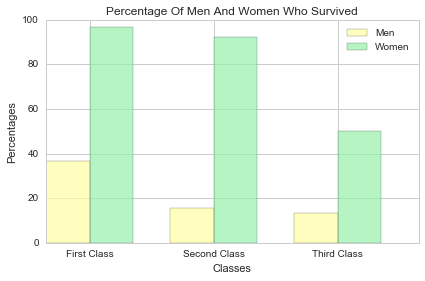

In [63]:
## Plotting percentages of males, females belonging to different classes 
import numpy as np
import matplotlib.pyplot as plt
%pylab inline


n_groups = 3
means_men = (percent_class1_males, percent_class2_males, percent_class3_males)
means_women = (percent_class1_females, percent_class2_females, percent_class3_females)


fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.7
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='y',
                 yerr=0,
                 error_kw=error_config,
                 label='Men')
rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='g',
                 yerr=0,
                 error_kw=error_config,
                 label='Women')

plt.xlabel('Classes')
plt.ylabel('Percentages')
plt.title('Percentage Of Men And Women Who Survived')
plt.xticks(index + bar_width, ('First Class', 'Second Class', 'Third Class'))
plt.legend()

plt.tight_layout()
plt.show()

From here, we can conclude
% 1st Class Women Survivors > % 2nd Class Women Survivors > % 3rd Class Women Survivors  , and
% 1st Class Men Survivors > % 2nd Class Men Survivors > % 3rd Class Men Survivors

### (vi) Did travelling with family/companion affect a passenger's survival?

In [64]:
## Number of passengers who were travelling with a companion/family
not_alone = (passengerinfo[(passengerinfo['SibSp']>0) | (passengerinfo['Parch']>0)])

## Number of passengers who were travelling alone
alone = (passengerinfo[(passengerinfo['SibSp']==0) & (passengerinfo['Parch']==0)])

not_alone_survived = (passengerinfo[((passengerinfo['SibSp']>0) | (passengerinfo['Parch']>0)) & passengerinfo['Survived']])
alone_survived = (passengerinfo[((passengerinfo['SibSp']==0) & (passengerinfo['Parch']==0)) & passengerinfo['Survived']])

## Percentages of passengers who were travelling alone/with company who survived/did not survive
percent_not_alone_survived = len(not_alone_survived)* 1.0/len(not_alone)*100
percent_alone_survived = len(alone_survived)* 1.0/len(alone)*100

print '{} = {} %'.format('Survival % Of Passengers travelling with company', np.around(percent_not_alone_survived, decimals=2))
print '{} = {} %'.format('Survival % Of Passengers travelling alone', np.around(percent_alone_survived, decimals=2))

Survival % Of Passengers travelling with company = 50.56 %
Survival % Of Passengers travelling alone = 30.35 %


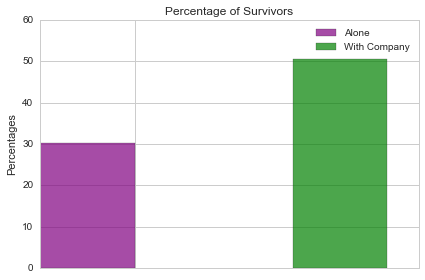

In [66]:
## Plotting percentages of passengers who are travelling alone/with company who survived/did not survive
plotbar(percent_alone_survived, percent_not_alone_survived, 'Percentage of Survivors','purple','green',np.arange(0, 70, 10),'Alone','With Company')

Clearly, passengers who travelled with family or a companion had a higher chance of survival than those who travelled alone. Travelling with someone who could help you to safety would definitely weigh in favour of those travelling with company. 

## Conclusion
#### (i) The no. of surviving females (74.20%) far exceeded the no. of surviving males (18.89%) aboard RMS Titanic.
#### (ii) Similarly, the no. of children surviving the disaster (53.98%) significantly exceeded the no. of adults (38.10%).
#### (iii) Significantly more 1st Class passengers (62.96%) survived compared to 2nd Class (47.28%) and 3rd Class (24.24%) passengers. 
#### (iv) Passengers travelling with company had a higher survival rate (50.56%) than those who were travelling alone (30.35%).

## References :
https://www.kaggle.com/c/titanic/data
https://en.wikipedia.org/wiki/Women_and_children_first
http://pbpython.com/simple-graphing-pandas.html
http://pandas.pydata.org/pandas-docs/stable/visualization.html